In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install scipy
from scipy import stats
%store -r american_data
%store -r south_america_data
%store -r north_america_data
%store -r european_data
%store -r asian_data
%store -r african_data
%store -r oceanian_data

Below we can see european countries with the lowest and highest values, which we may consider as outliers.

In [72]:
for column in european_data.columns[2:]:
    max_country = european_data.loc[european_data[column].idxmax(
    )]["Country name"]
    min_country = european_data.loc[european_data[column].idxmin(
    )]["Country name"]

    print(f"Category: {column}")
    print(f"Max value: {max_country} ({european_data[column].max()})")
    print(f"Min value: {min_country} ({european_data[column].min()})")
    print()

Category: Life Ladder
Max value: Denmark (8.019)
Min value: Bulgaria (3.844)

Category: Log GDP per capita
Max value: Ireland (11.676)
Min value: Kosovo (8.858)

Category: Social support
Max value: Iceland (0.985)
Min value: Albania (0.626)

Category: Healthy life expectancy at birth
Max value: Switzerland (73.3)
Min value: Moldova (59.48)

Category: Freedom to make life choices
Max value: Denmark (0.971)
Min value: Bosnia and Herzegovina (0.258)

Category: Generosity
Max value: Malta (0.456)
Min value: Greece (-0.34)

Category: Perceptions of corruption
Max value: Hungary (0.983)
Min value: Finland (0.132)

Category: Positive affect
Max value: Iceland (0.851)
Min value: Belarus (0.409)

Category: Negative affect
Max value: Greece (0.482)
Min value: Kosovo (0.1)



Let`s identify which year was the happiest for the countries in Europe.

In [76]:
columns_to_sum = european_data.columns[2:]

happiest_years = european_data.groupby(
    "Country name")[columns_to_sum].sum().idxmax(axis=1)

print("Happiest year for each european country:")
for country, year in happiest_years.items():
    print(
        f"{country}: {european_data.loc[european_data['Country name'] == country, 'year'].values[0]}")

Happiest year for each european country:
Albania: 2007
Austria: 2006
Belarus: 2006
Belgium: 2005
Bosnia and Herzegovina: 2007
Bulgaria: 2007
Croatia: 2007
Denmark: 2005
Estonia: 2006
Finland: 2006
France: 2005
Germany: 2005
Greece: 2005
Hungary: 2005
Iceland: 2008
Ireland: 2006
Italy: 2005
Kosovo: 2007
Latvia: 2006
Lithuania: 2006
Luxembourg: 2009
Malta: 2009
Moldova: 2006
Montenegro: 2007
Netherlands: 2005
North Macedonia: 2007
Norway: 2006
Poland: 2005
Portugal: 2006
Romania: 2005
Serbia: 2007
Slovakia: 2006
Slovenia: 2006
Spain: 2005
Sweden: 2005
Switzerland: 2006
Ukraine: 2006
United Kingdom: 2005


Let`s identify outliers in each region.

EUROPEAN OUTLIERS

In [81]:
# Find outliers based on Z-score threshold (e.g., Z-score > 3 or < -3)
z_scores = stats.zscore(european_data.iloc[:, 2:])

outliers_zscore = european_data[(z_scores > 3).any(
    axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers detected using Z-Score Method:")
print(outliers_zscore)

Outliers detected using Z-Score Method:
                Country name  year  Life Ladder  Log GDP per capita  \
21                   Albania  2014        4.814               9.358   
22                   Albania  2015        4.607               9.382   
23                   Albania  2016        4.511               9.417   
24                   Albania  2017        4.640               9.455   
25                   Albania  2018        5.004               9.497   
26                   Albania  2019        4.995               9.522   
236   Bosnia and Herzegovina  2015        5.117               9.428   
497                  Croatia  2014        5.381              10.091   
777                   Greece  2013        4.720              10.233   
1568         North Macedonia  2010        4.180               9.512   
1725                 Romania  2010        4.909               9.924   

      Social support  Healthy life expectancy at birth  \
21             0.626                            6

In [82]:
# Find outliers using IQR method
Q1 = european_data.iloc[:, 2:].quantile(0.25)
Q3 = european_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = european_data[((european_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (european_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
                Country name  year  Life Ladder  Log GDP per capita  \
17                   Albania  2010        5.269               9.283   
21                   Albania  2014        4.814               9.358   
22                   Albania  2015        4.607               9.382   
23                   Albania  2016        4.511               9.417   
24                   Albania  2017        4.640               9.455   
25                   Albania  2018        5.004               9.497   
26                   Albania  2019        4.995               9.522   
27                   Albania  2020        5.365               9.494   
28                   Albania  2021        5.255               9.588   
29                   Albania  2022        5.212               9.649   
30                   Albania  2023        5.445               9.689   
230   Bosnia and Herzegovina  2009        4.963               9.246   
232   Bosnia and He

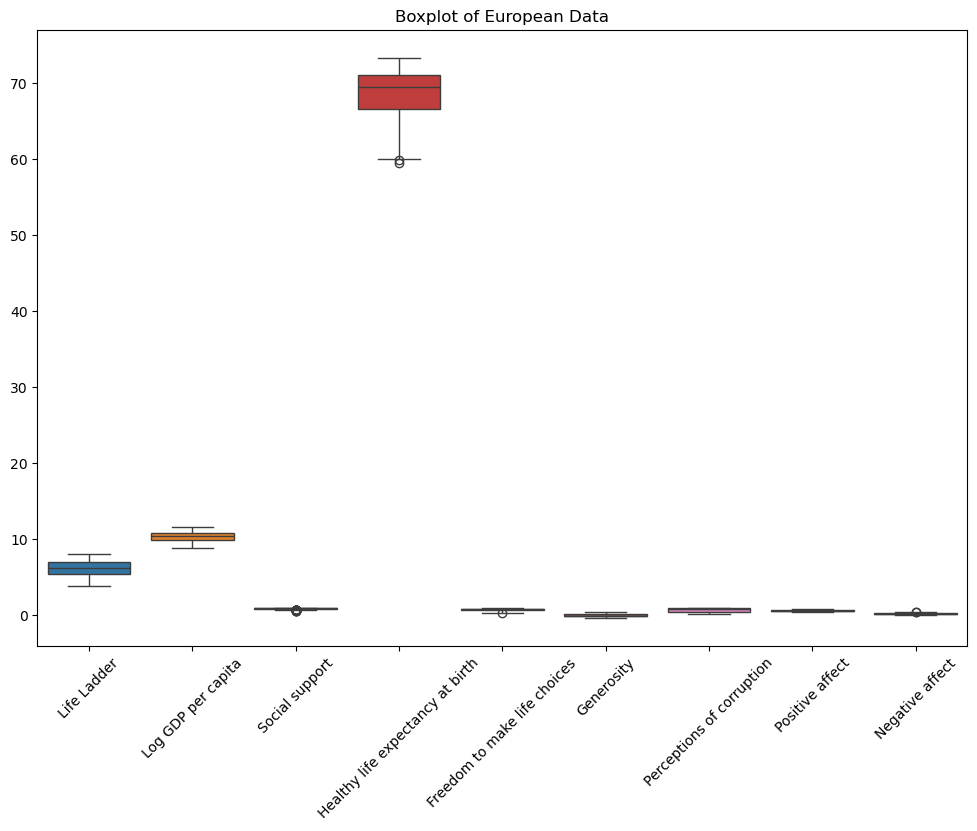

In [83]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=european_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

NORTH AMERICAN OUTLIERS

In [84]:
# Find outliers based on Z-score threshold (e.g., Z-score > 3 or < -3)
z_scores = stats.zscore(north_america_data.iloc[:, 2:])

outliers_zscore = north_america_data[(z_scores > 3).any(
    axis=1) | (z_scores < -3).any(axis=1)]
print("Outliers detected using Z-Score Method:")
print(outliers_zscore)

Outliers detected using Z-Score Method:
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
507          Cuba  2006        5.418                 NaN           0.970   
818         Haiti  2006        3.754               7.976           0.694   
819         Haiti  2008        3.846               8.016           0.679   
820         Haiti  2010        3.766               7.987           0.554   
821         Haiti  2011        4.845               8.026           0.567   
822         Haiti  2012        4.413               8.015           0.749   
823         Haiti  2013        4.622               8.043           0.648   
825         Haiti  2015        3.570               8.056           0.564   
826         Haiti  2016        3.352               8.060           0.584   
827         Haiti  2017        3.824               8.071           0.647   
1528    Nicaragua  2018        5.819               8.637           0.854   

      Healthy life expectancy at birth  Freedom

In [90]:
# Find outliers using IQR method
Q1 = north_america_data.iloc[:, 2:].quantile(0.25)
Q3 = north_america_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = north_america_data[((north_america_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (north_america_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
             Country name  year  Life Ladder  Log GDP per capita  \
349                Canada  2005        7.418              10.707   
350                Canada  2007        7.482              10.734   
351                Canada  2008        7.486              10.733   
352                Canada  2009        7.488              10.692   
353                Canada  2010        7.650              10.711   
354                Canada  2011        7.426              10.733   
355                Canada  2012        7.415              10.739   
356                Canada  2013        7.594              10.752   
357                Canada  2014        7.304              10.770   
358                Canada  2015        7.413              10.769   
359                Canada  2016        7.245              10.768   
360                Canada  2017        7.415              10.786   
361                Canada  2018        7.175              

After identifying outliers using z-score and IQR methods, we can clearly see that IQR method detect more outliers than z-score one. So from now on we will test regions by using IQR method only.

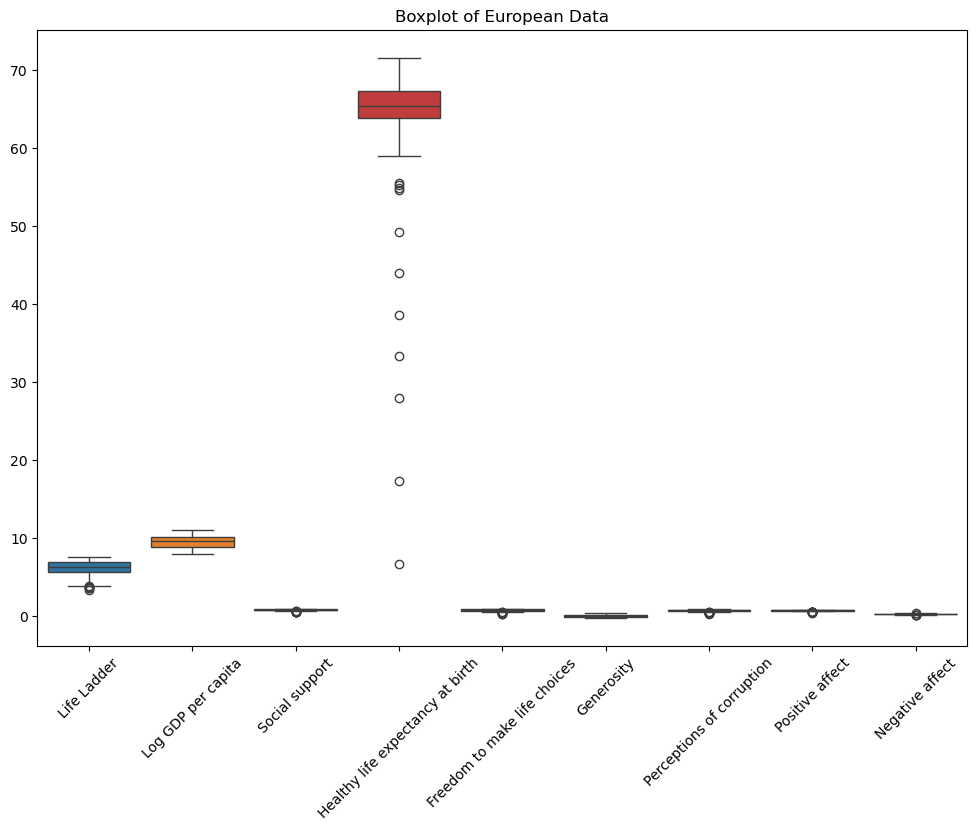

In [85]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=north_america_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

SOUTH AMERICAN OUTLIERS

In [91]:
# Find outliers using IQR method
Q1 = south_america_data.iloc[:, 2:].quantile(0.25)
Q3 = south_america_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = south_america_data[((south_america_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (south_america_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
388         Chile  2006        6.063               9.870           0.836   
389         Chile  2007        5.698               9.910           0.815   
391         Chile  2009        6.494               9.916           0.832   
394         Chile  2012        6.599              10.063           0.855   
396         Chile  2014        6.844              10.094           0.862   
817        Guyana  2007        5.993               9.089           0.849   
1636     Paraguay  2011        5.677               9.360           0.869   
1637     Paraguay  2012        5.820               9.339           0.931   
1662         Peru  2020        4.994               9.323           0.749   
2243      Uruguay  2006        5.786               9.640           0.912   
2246      Uruguay  2009        6.296               9.808           0.924   
2247      Uruguay  2010       

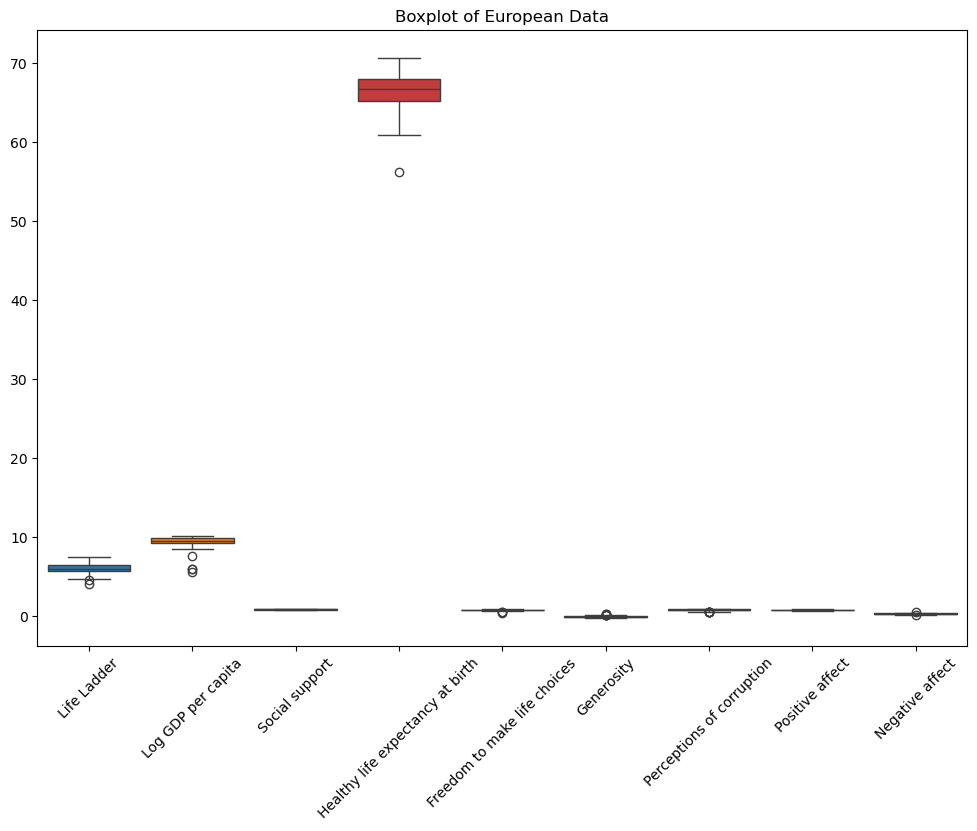

In [86]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=south_america_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

ASIAN OUTLIERS

In [92]:
# Find outliers using IQR method
Q1 = asian_data.iloc[:, 2:].quantile(0.25)
Q3 = asian_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = asian_data[((asian_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (asian_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
              Country name  year  Life Ladder  Log GDP per capita  \
0              Afghanistan  2008        3.724               7.350   
1              Afghanistan  2009        4.402               7.509   
2              Afghanistan  2010        4.758               7.614   
3              Afghanistan  2011        3.832               7.581   
4              Afghanistan  2012        3.783               7.661   
...                    ...   ...          ...                 ...   
2085              Thailand  2014        6.985               9.649   
2191  United Arab Emirates  2006        6.734              11.433   
2192  United Arab Emirates  2009        6.866              10.952   
2193  United Arab Emirates  2010        7.097              10.909   
2267            Uzbekistan  2013        5.940               8.662   

      Social support  Healthy life expectancy at birth  \
0              0.451                             50.50 

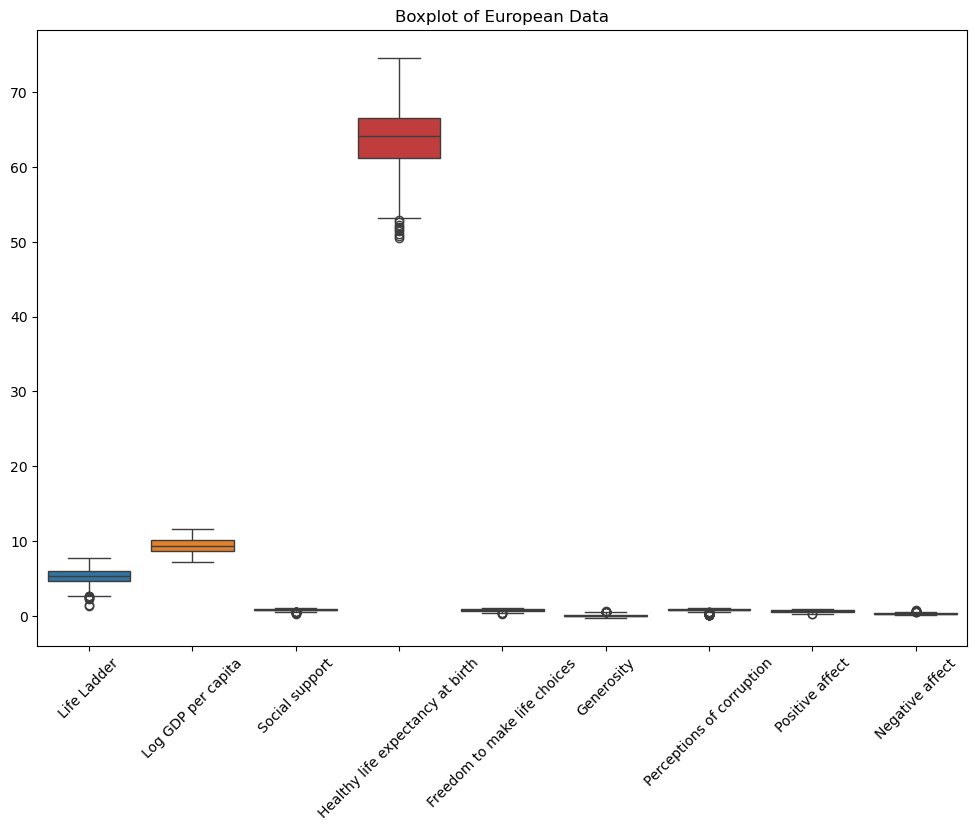

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=asian_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

AFRICAN OUTLIERS

In [93]:
# Find outliers using IQR method
Q1 = african_data.iloc[:, 2:].quantile(0.25)
Q3 = african_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = african_data[((african_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (african_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
34        Algeria  2014        6.355               9.355           0.818   
38        Algeria  2019        4.745               9.361           0.803   
45         Angola  2014        3.795               9.010           0.755   
194         Benin  2008        3.667               7.891           0.382   
204         Benin  2020        4.408               8.067           0.507   
...           ...   ...          ...                 ...             ...   
2125      Tunisia  2022        4.261               9.267           0.755   
2126      Tunisia  2023        4.505               9.282           0.702   
2345     Zimbabwe  2006        3.826               7.460           0.822   
2346     Zimbabwe  2007        3.280               7.413           0.828   
2347     Zimbabwe  2008        3.174               7.210           0.843   

      Healthy life expectancy

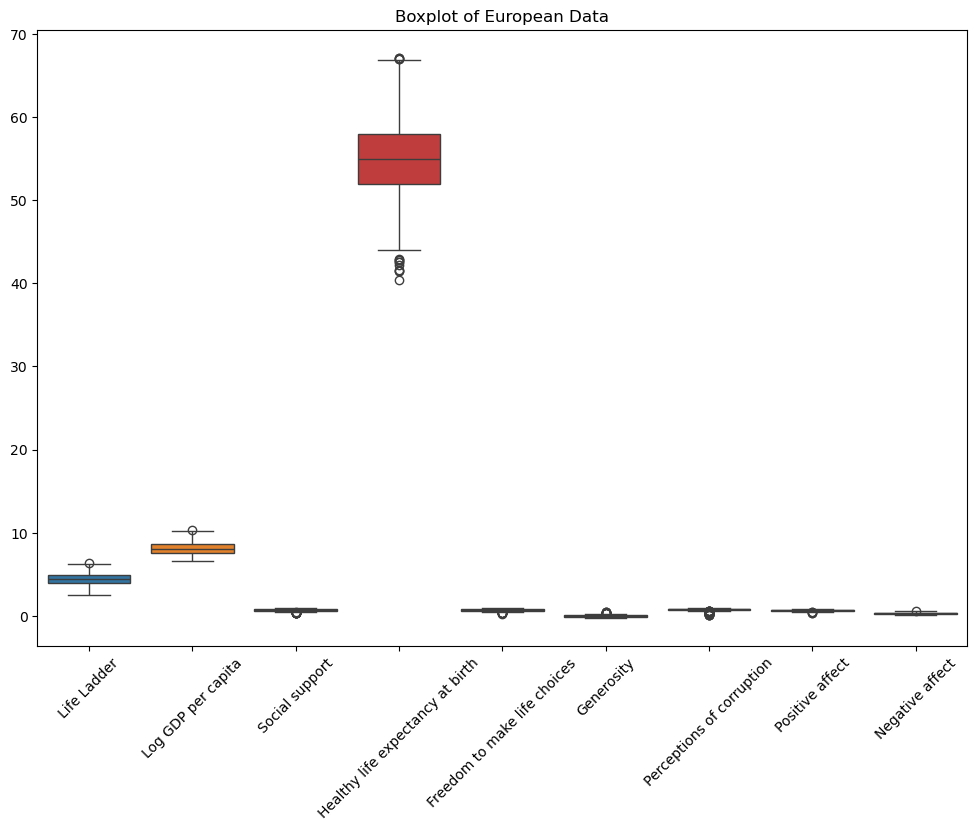

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=african_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

OCEANIAN OUTLIERS

In [94]:
# Find outliers using IQR method
Q1 = oceanian_data.iloc[:, 2:].quantile(0.25)
Q3 = oceanian_data.iloc[:, 2:].quantile(0.75)

IQR = Q3 - Q1

outliers_iqr = oceanian_data[((oceanian_data.iloc[:, 2:] < (
    Q1 - 1.5 * IQR)) | (oceanian_data.iloc[:, 2:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected using Interquartile Range (IQR) Method:")
print(outliers_iqr)

Outliers detected using Interquartile Range (IQR) Method:
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
96      Australia  2022        7.035              10.840           0.942   
97      Australia  2023        7.025              10.846           0.896   
1500  New Zealand  2007        7.604              10.562           0.967   
1505  New Zealand  2013        7.280              10.585           0.958   
1507  New Zealand  2015        7.418              10.622           0.987   
1514  New Zealand  2022        6.975              10.712           0.956   
1515  New Zealand  2023        6.976              10.720           0.933   

      Healthy life expectancy at birth  Freedom to make life choices  \
96                              71.125                         0.854   
97                              71.200                         0.876   
1500                            69.740                         0.878   
1505                            69.860       

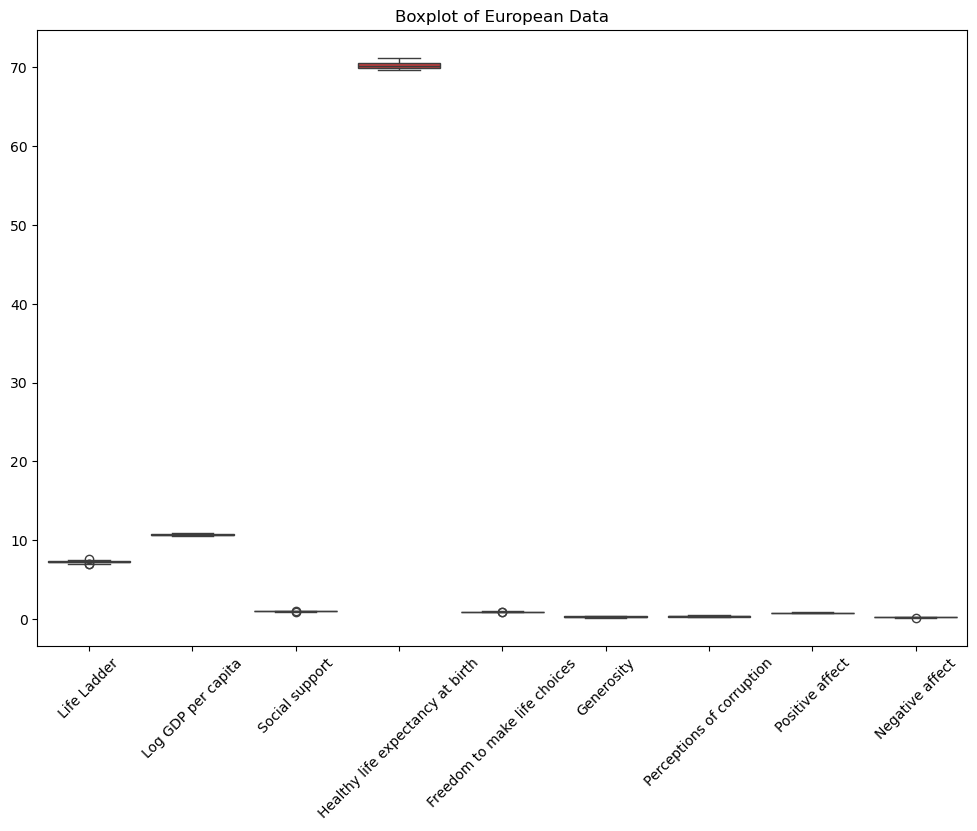

In [89]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=oceanian_data.iloc[:, 2:])
plt.title('Boxplot of European Data')
plt.xticks(rotation=45)
plt.show()

Now let`s move to comparison. Which region is happier overall ? Eourope or America ?

In [101]:
# the sum of values for each column for European data
european_column_sums = european_data.iloc[:, 2:].sum()

# the sum of values for each column for American data
american_column_sums = american_data.iloc[:, 2:].sum()

# Sum up happiness values for European data
european_sum = european_data.iloc[:, 2:].sum(axis=1).sum()

# Sum up happiness values for American data
american_sum = american_data.iloc[:, 2:].sum(axis=1).sum()

# Determine which region is happier overall
if european_sum > american_sum:
    print("Europe is happier overall.")
elif american_sum > european_sum:
    print("America is happier overall.")
else:
    print("Europe and America have the same level of happiness.")

print()

# Print the sum of values for each column in Europe
print("Sum of values for each column in Europe:")
print()
print(european_column_sums)

print()

# Print the sum of values for each column in America
print("Sum of values for each column in America:")
print()
print(american_column_sums)

Europe is happier overall.

Sum of values for each column in Europe:

Life Ladder                          3841.586
Log GDP per capita                   6375.333
Social support                        550.582
Healthy life expectancy at birth    41276.520
Freedom to make life choices          473.924
Generosity                             -4.020
Perceptions of corruption             431.261
Positive affect                       396.526
Negative affect                       154.479
dtype: float64

Sum of values for each column in America:

Life Ladder                          2358.112
Log GDP per capita                   3615.954
Social support                        328.012
Healthy life expectancy at birth    25160.145
Freedom to make life choices          306.006
Generosity                             -6.567
Perceptions of corruption             293.537
Positive affect                       293.317
Negative affect                       110.381
dtype: float64


QUESTION

Provide recommendations for a hypothetical scenario where a US citizen is considering moving to Europe, specifically to countries like Poland, Norway, or Italy. Discuss the advantages and disadvantages of staying in the US versus moving to these European countries.

In [106]:
import pandas as pd

# Assuming european_data is your DataFrame

# List of countries to analyze
countries = ['Poland', 'Norway', 'Italy']

# Filter the DataFrame to include only the selected countries
selected_countries_data = european_data[european_data['Country name'].isin(
    countries)].copy()

# Calculate the happiness level as the sum of each column starting from the third column
selected_countries_data.loc[:,
                            'Happiness Level'] = selected_countries_data.iloc[:, 2:].sum(axis=1)

# Print the happiness levels and each column's value for each country
for country in countries:
    country_data = selected_countries_data[selected_countries_data['Country name'] == country]
    happiness_level = country_data['Happiness Level'].values[0]
    print(f"Happiness Level for {country}: {happiness_level}")
    print()
    for column in european_data.columns[2:]:
        column_value = country_data[column].values[0]
        print(f"{column}: {column_value}")
    print()

Happiness Level for Poland: 85.211

Life Ladder: 5.587
Log GDP per capita: 9.844
Social support: 0.922
Healthy life expectancy at birth: 66.2
Freedom to make life choices: 0.782
Generosity: nan
Perceptions of corruption: 0.983
Positive affect: 0.611
Negative affect: 0.282

Happiness Level for Norway: 91.25300000000001

Life Ladder: 7.416
Log GDP per capita: 11.056
Social support: 0.959
Healthy life expectancy at birth: 69.4
Freedom to make life choices: 0.96
Generosity: 0.101
Perceptions of corruption: 0.397
Positive affect: 0.767
Negative affect: 0.197

Happiness Level for Italy: 91.72699999999999

Life Ladder: 6.854
Log GDP per capita: 10.698
Social support: 0.928
Healthy life expectancy at birth: 70.6
Freedom to make life choices: 0.802
Generosity: nan
Perceptions of corruption: 0.944
Positive affect: 0.606
Negative affect: 0.295



For American citizens who are thinking of relocating to Europe—more especially, to Poland, Norway, or Italy—the following overview is based on indicators of living quality and happiness:

Poland provides high social support (0.922) and a respectable level of happiness (Life Ladder: 5.587). On the other hand, it has lesser positive affect (0.611) and higher views of corruption (0.983). The average healthy life expectancy is 66.2 years.

With a high life expectancy (69.4 years), a solid social support system (0.959), an exceptional GDP per capita (11.056), and a high happiness score (7.416), Norway stands out. Strong points include low perceptions of corruption (0.397) and personal freedom (0.96), yet living expenses are considerable.

Italy provides the longest healthy life expectancy (70.6 years) and balanced happiness (6.854). Robust societal backing (0.928) and moderate individual autonomy (0.802). Nonetheless, its perception of corruption is higher (0.944).

Comparing: The US has a more varied employment market and higher incomes than other countries, but it also frequently scores lower on social support and personal freedom. Access to healthcare can be a sensitive topic.

Recommendations:

Norway: The best country for people looking for strong social support, individual freedom, and good health.

Italy: A good choice for people who value cultural experiences and good health.

Poland: Its rising economy and affordability make it appealing.

Compared to the US, every country offers distinct advantages that could result in a happier and more satisfying existence.